**Import bibliotek:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

**Importujemy bazę danych:**

In [2]:
penguins = pd.read_csv('penguins.csv')
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


**Sprawdzamy czy w zbiorze danych posiadamy braki:**

<Axes: >

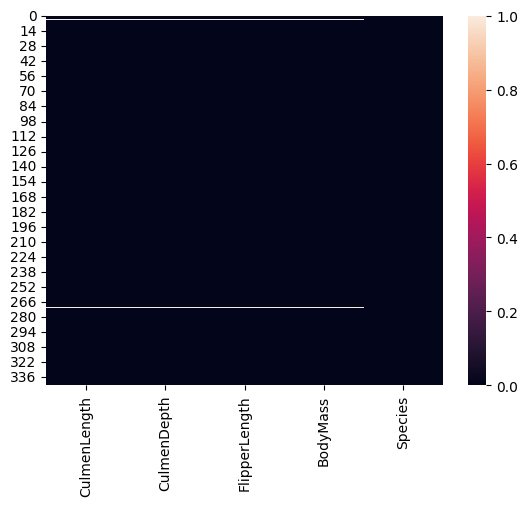

In [3]:
sns.heatmap(penguins.isnull())

**Ustalamy zbiory danych: cechy oraz gatunek / jeszcze na zbiorach z brakami:**

In [4]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
target = 'Species'
X_with_NaN, y = penguins[features], penguins[target]

**Ustanawiamy zbiory testowe i treningowe. Uzupełniamy dane o średnią ze zbioru treningowego. Ustanawiamy nowe zbiory treningowe i testowe z uzupełnionymi danymi:**

In [5]:
X_train_with_NaN, X_test_NaN, y_train_with_NaN, y_test_with_NaN = train_test_split(X_with_NaN, y, test_size=0.30, random_state=0, stratify=y)

X = penguins[features].fillna(X_train_with_NaN[features].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

**Sprawdzamy udział procentowy dla grupy: gatunek - "Species":**

In [6]:
pd.Series(y).value_counts(normalize=True)

Species
0    0.441860
1    0.360465
2    0.197674
Name: proportion, dtype: float64

**Sprawdzamy rozkład dla cech:**

In [7]:
X.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
count,344.000000,344.000000,344.000000,344.000000
mean,43.921866,17.150704,200.916015,4201.655633
std,5.443643,1.969037,14.020662,799.614103
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**Generujemy wykresy pudełkowe dla naszych gatunków vs. cecha:**

Unique values: 165


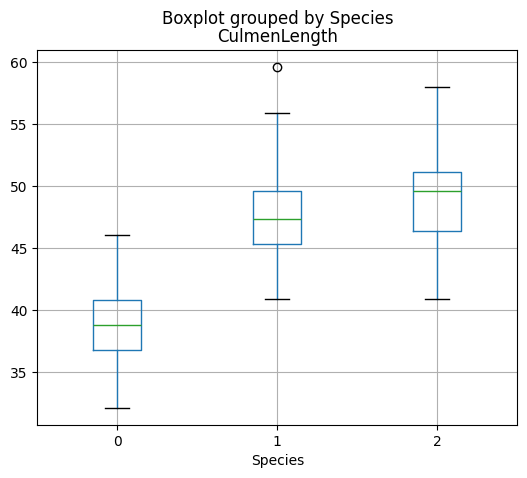

Unique values: 81


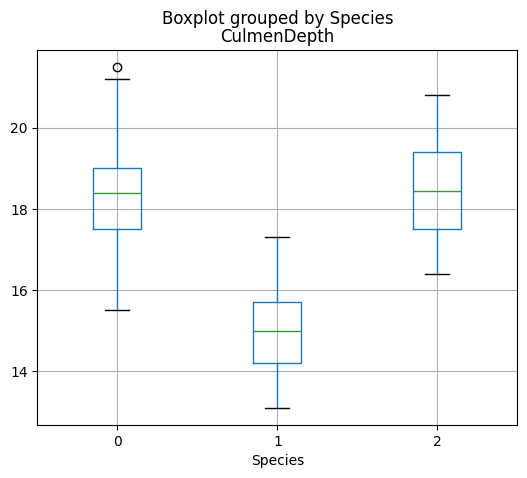

Unique values: 56


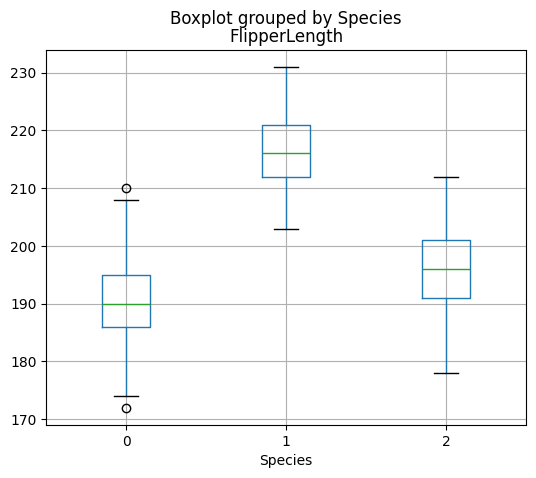

Unique values: 95


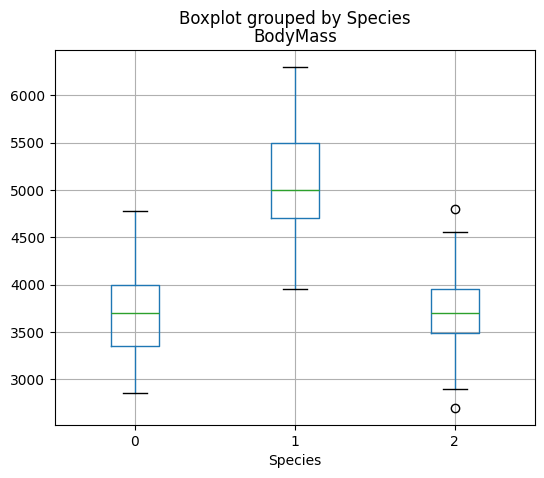

In [8]:
import matplotlib.pyplot as plt
for col in features:
    print(f'Unique values: {len(penguins[col].unique())}')
    penguins.boxplot(column=col, by='Species', figsize=(6,5))
    plt.title(col)
    plt.show()

**Sprawdzamy korelacje na wykresach:**

C:\Users\marci\AppData\Local\Temp\ipykernel_32296\2346379766.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='yellow', label='Gatunek 0')
C:\Users\marci\AppData\Local\Temp\ipykernel_32296\2346379766.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

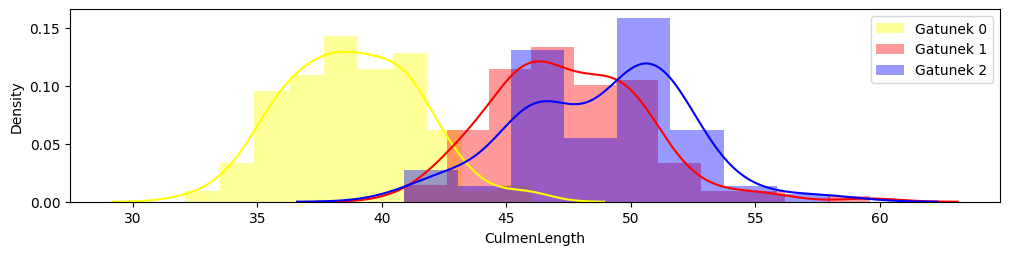

C:\Users\marci\AppData\Local\Temp\ipykernel_32296\2346379766.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='yellow', label='Gatunek 0')
C:\Users\marci\AppData\Local\Temp\ipykernel_32296\2346379766.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

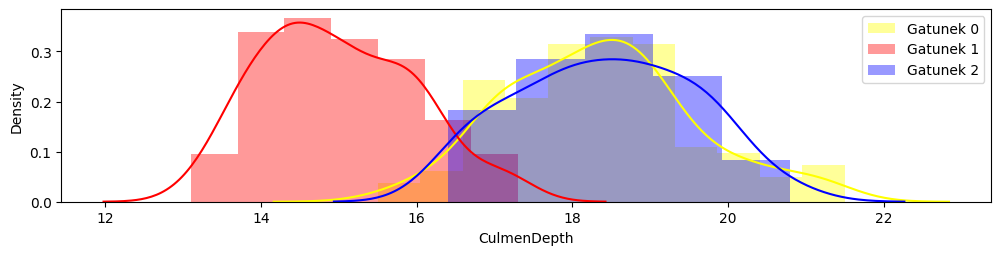

C:\Users\marci\AppData\Local\Temp\ipykernel_32296\2346379766.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='yellow', label='Gatunek 0')
C:\Users\marci\AppData\Local\Temp\ipykernel_32296\2346379766.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

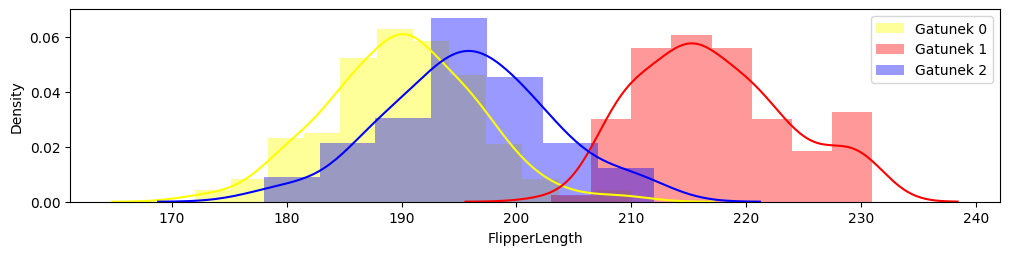

C:\Users\marci\AppData\Local\Temp\ipykernel_32296\2346379766.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='yellow', label='Gatunek 0')
C:\Users\marci\AppData\Local\Temp\ipykernel_32296\2346379766.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

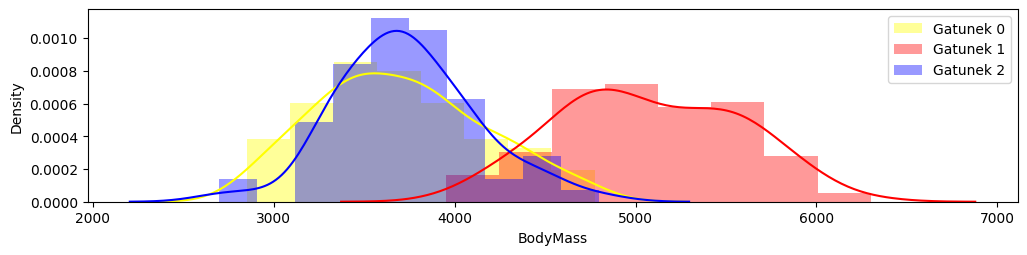

In [9]:
import seaborn as sns
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='yellow', label='Gatunek 0')
    sns.distplot(penguins.loc[penguins['Species']==1, col], kde=True, color='red', label='Gatunek 1')
    sns.distplot(penguins.loc[penguins['Species']==2, col], kde=True, color='blue', label='Gatunek 2')
    plt.legend(loc='upper right')
    plt.show()

In [10]:
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

CulmenLength     0.778626
FlipperLength    0.356886
BodyMass         0.209426
CulmenDepth     -0.182720
dtype: float64

**Ustanawiamy nowe dane treningowe - pozbywamy się BodyMass - jest to cecha, która pokrywa się z FlipperLength. Dokonujemy standaryzacji cech:**

In [11]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X[['CulmenLength','CulmenDepth','FlipperLength']], y, test_size=0.30, random_state=0, stratify=y)

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

**Tworzymy funkcję calculate_metrics:**

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score','accuracy','precision','recall'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []



def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    f1_metric = round(f1_score(y_checked, predictions, average='weighted'), 4)
    accuracy = round(accuracy_score(y_test, predictions),4)
    precision = round(precision_score(y_test, predictions, average='weighted'),4)
    recall = round(recall_score(y_test, predictions,  average='weighted'),4)
   
    
    new_row = pd.DataFrame([{'Model': name, 'F1_score': f1_metric, 'accuracy': accuracy,'precision':precision,'recall':recall}])
    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)
    return metrics_dataframe

**Tworzymy różne modele:**

In [13]:
model_LR = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000)
model_knn = KNeighborsClassifier(n_neighbors= 10)
model_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
model_svm = SVC(kernel='rbf', probability=True)
model_forest = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_leaf=10)
model_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
model_voting = VotingClassifier(estimators=[('Tree', model_tree),
                                            ('Random Forest', model_forest),
                                            ('AdaBoost', model_adaboost)],
                                voting='soft')

random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)

**Trenujemy nasze modele:**

In [ ]:
model_LR.fit(X_train_standardized, y_train)
model_knn.fit(X_train_standardized, y_train)
model_tree.fit(X_train, y_train)
model_svm.fit(X_train_standardized, y_train)
model_forest.fit(X_train, y_train)
model_adaboost.fit(X_train, y_train)
model_voting.fit(X_train, y_train)
rf_gridsearch.fit(X_train, y_train)

C:\projects\Wizualizacja_danych_cz1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


**Wizualizujemy metryki naszych modeli:**

In [ ]:
calculate_metrics(model_LR, 'LogisticRegression', X_test_standardized, y_test)
calculate_metrics(model_knn, 'knn', X_test_standardized, y_test)
calculate_metrics(model_tree, 'tree', X_test, y_test)
calculate_metrics(model_svm, 'SVC', X_test_standardized, y_test)
calculate_metrics(model_forest, 'forest', X_test, y_test)
calculate_metrics(model_adaboost, 'adaboost', X_test, y_test)
calculate_metrics(model_voting, 'model_voting', X_test, y_test)
calculate_metrics(rf_gridsearch, 'rf_gridsearch', X_test, y_test)